In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
a = pd.read_csv("animals1.csv")

In [12]:
a.describe()

,"Label (Beaver, Cat, Rabbit, Squirrel, Opossum)",Brain,Body
count,206.000000,206.000000,206.000000
mean,1.621359,21.666019,14.027913
std,1.292504,7.065215,7.708226
min,0.000000,9.080000,3.050000
25%,1.000000,14.567500,7.175000
50%,1.000000,25.030000,10.725000
75%,2.000000,27.617500,22.250000
max,4.000000,32.480000,27.550000


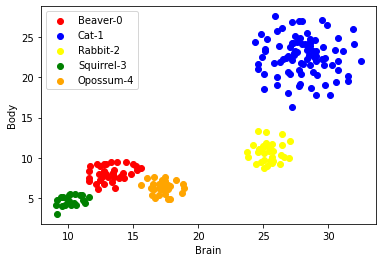

In [20]:
a0  = a[a["Label (Beaver, Cat, Rabbit, Squirrel, Opossum)"]== 0]
a1  = a[a["Label (Beaver, Cat, Rabbit, Squirrel, Opossum)"]== 1]
a2  = a[a["Label (Beaver, Cat, Rabbit, Squirrel, Opossum)"]== 2]
a3  = a[a["Label (Beaver, Cat, Rabbit, Squirrel, Opossum)"]== 3]
a4  = a[a["Label (Beaver, Cat, Rabbit, Squirrel, Opossum)"]== 4]
plt.scatter(a0["Brain"], a0["Body"], color = 'red', label = 'Beaver-0')
plt.scatter(a1["Brain"], a1["Body"], color = 'blue', label = 'Cat-1')
plt.scatter(a2["Brain"], a2["Body"], color = 'yellow', label = 'Rabbit-2')
plt.scatter(a3["Brain"], a3["Body"], color = 'green', label = 'Squirrel-3')
plt.scatter(a4["Brain"], a4["Body"], color = 'orange', label = 'Opossum-4')
plt.legend(loc="upper left")
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [22]:
n = [8.5,18.0]
def predict(n):
    distance_dict = {}
    for i in range(len(a)):
        distance_dict [i] = ((a.loc[i, "Brain"] - n[0])**2 +  (a.loc[i, "Body"] - n[1])**2)**(1/2)
    closest = min(distance_dict, key=distance_dict.get)
    y_hat = a.loc[closest, "Label (Beaver, Cat, Rabbit, Squirrel, Opossum)"]
    return y_hat

In [25]:
a_train = pd.read_csv("animalsND_train.csv")
a_train["y_hat"] = 0
a_train.head()

,"Label (A, B, C, D, E, F)",Width,Height,Length,Weight,Brain,Life expectancy,y_hat
0,3,3.95,12.79,10.45,0.899,4.89,8.25,0
1,2,4.21,12.71,10.83,11.660,9.09,5.92,0
2,2,3.00,13.88,11.41,10.210,14.78,5.42,0
3,3,4.79,12.71,10.76,0.885,8.73,10.72,0
4,3,5.09,15.40,7.68,1.143,13.95,8.54,0


In [28]:
a_test = pd.read_csv("animalsND_test.csv")
a_test.head()

,"Label (A, B, C, D, E, F)",Width,Height,Length,Weight,Brain,Life expectancy
0,0,11.24,15.30,4.720,11.340,6.48,9.30
1,1,10.14,11.63,0.984,10.060,12.50,5.29
2,5,8.84,11.10,3.870,7.480,10.80,10.24
3,3,5.75,9.73,7.390,1.004,19.59,9.01
4,3,5.35,15.78,7.790,0.882,12.14,9.79


In [29]:
for i in range(len(a_train)):
    n = [a_train.loc[i, "Brain"],a_train.loc[i, "Length"]]
    y_hat = predict(n)
    a_train.loc[i, "y_hat"] = y_hat

In [30]:
a_train

,"Label (A, B, C, D, E, F)",Width,Height,Length,Weight,Brain,Life expectancy,y_hat
0,3,3.95,12.79,10.450,0.899,4.89,8.25,0
1,2,4.21,12.71,10.830,11.660,9.09,5.92,0
2,2,3.00,13.88,11.410,10.210,14.78,5.42,0
3,3,4.79,12.71,10.760,0.885,8.73,10.72,0
4,3,5.09,15.40,7.680,1.143,13.95,8.54,0
...,...,...,...,...,...,...,...,...
239,0,10.04,11.12,5.260,7.000,10.92,9.62,3
240,3,4.92,11.99,9.600,0.958,15.01,10.30,0
241,1,11.09,16.52,1.001,11.150,14.72,4.65,4
242,5,11.09,11.85,7.050,15.190,6.31,10.54,3
